In [1]:
import plotastic as plst
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Set Plot Style
plst.set_style("paper")
plst.set_palette("hls", verbose=True)

#! You chose this color palette: ['#db5f57', '#dbc257', '#91db57', '#57db80', '#57d3db', '#5770db', '#a157db', '#db57b2']


['#db5f57',
 '#dbc257',
 '#91db57',
 '#57db80',
 '#57d3db',
 '#5770db',
 '#a157db',
 '#db57b2']

# Example Analysis: qPCR


**Raw Data:** https://github.com/markur4/plotastic/tree/main/src/plotastic/example_data/data
  
**Original Source:** (unpublished)



In [3]:
# Import Example Data
DF, _dims = plst.load_dataset("qpcr", verbose=False)
dims = dict(
    y="fc",
    x="gene",
    hue="fraction",
    # col= 'method',
    row="class",
)
DA = plst.DataAnalysis(DF, dims, subject="subject", verbose=False)

In [4]:
DA.transform_y("log10", inplace=True)  # Log transform
DA.check_normality()  # -> Only few groups are not normal -> parametric

W      pval  normal   n
class           gene fraction                                
Bone Metabolism F1   FBN1      0.936873  0.518768    True  10
                     SOST      0.880395  0.131862    True  10
                     TIMP1     0.745494  0.004807   False   9
                F2   FBN1      0.954764  0.705148    True  11
                     SOST      0.967810  0.863610    True  11
                     TIMP1     0.914325  0.274168    True  11
                F3   FBN1      0.915247  0.281020    True  11
                     SOST      0.923112  0.345415    True  11
                     TIMP1     0.937230  0.488505    True  11
Chemokines      F1   LOXL2     0.930358  0.451421    True  10
                     JAK2      0.897331  0.204749    True  10
                F2   LOXL2     0.874630  0.088876    True  11
                     JAK2      0.960025  0.772006    True  11
                F3   LOXL2     0.943678  0.564652    True  11
                     JAK2      0.878406  0.099301    True  11
Cytokines       F1   RUNX2     0.947142  0.634825    True  10
                     STAT3     0.933422  0.482382    True  10
                     IL6R      0.927258  0.421472    True  10
                     TNFSF13   0.907481  0.264130    True  10
                F2   RUNX2     0.915611  0.283765    True  11
                     STAT3     0.907354  0.226836    True  11
                     IL6R      0.985709  0.989621    True  11
                     TNFSF13   0.958855  0.757330    True  11
                F3   RUNX2     0.924060  0.353917    True  11
                     STAT3     0.932663  0.438418    True  11
                     IL6R      0.826181  0.020798   False  11
                     TNFSF13   0.970421  0.890746    True  11
ECM & Adhesion  F1   IFNG      0.715267  0.001349   False  10
                     FZD4      0.981633  0.973303    True  10
                     PTCH1     0.911578  0.292008    True  10
                     CCL5      0.969121  0.882582    True  10
                F2   IFNG      0.899109  0.180269    True  11
                     FZD4      0.979590  0.963841    True  11
                     PTCH1     0.986610  0.990734    True  10
                     CCL5      0.925780  0.407685    True  10
                F3   IFNG      0.905665  0.216509    True  11
                     FZD4      0.923819  0.351743    True  11
                     PTCH1     0.957827  0.744318    True  11
                     CCL5      0.940093  0.521596    True  11
MMPs            F1   MMP7      0.955749  0.752957    True   9
                     MMP9      0.675286  0.005186   False   5
                F2   MMP7      0.926078  0.372552    True  11
                     MMP9      0.971128  0.901100    True  10
                F3   MMP7      0.924886  0.361455    True  11
                     MMP9      0.913554  0.268549    True  11
Signaling       F1   Vimentin  0.919696  0.354424    True  10
                     TNC       0.928589  0.434161    True  10
                     NOTCH1    0.922084  0.374662    True  10
                     WNT5A     0.903581  0.239742    True  10
                F2   Vimentin  0.957763  0.743507    True  11
                     TNC       0.959813  0.769352    True  11
                     NOTCH1    0.977556  0.951045    True  11
                     WNT5A     0.937156  0.487661    True  11
                F3   Vimentin  0.910924  0.250109    True  11
                     TNC       0.884194  0.117578    True  11
                     NOTCH1    0.779982  0.005132   False  11
                     WNT5A     0.812114  0.013581   False  11

In [5]:
DA.check_sphericity()

spher         W       chi2  dof      pval  \
class           fraction                                                
Bone Metabolism F1       0   True  0.592922   3.658847    2  0.160506   
                F2       0   True  0.703252   3.168356    2  0.205116   
                F3       0   True  0.832864   1.645964    2  0.439120   
Chemokines      F1       0   True       NaN        NaN    1  1.000000   
                F2       0   True       NaN        NaN    1  1.000000   
                F3       0   True       NaN        NaN    1  1.000000   
Cytokines       F1       0   True  0.629185   3.577934    5  0.614197   
                F2       0  False  0.262747  11.657816    5  0.040987   
                F3       0  False  0.210032  13.610980    5  0.019012   
ECM & Adhesion  F1       0   True  0.486690   5.560987    5  0.354712   
                F2       0   True  0.295164   8.202615    5  0.149255   
                F3       0   True  0.297080  10.586623    5  0.061736   
MMPs            F1       0   True       NaN        NaN    1  1.000000   
                F2       0   True       NaN        NaN    1  1.000000   
                F3       0   True       NaN        NaN    1  1.000000   
Signaling       F1       0   True  0.536227   4.812474    5  0.442437   
                F2       0   True  0.554009   5.151113    5  0.400336   
                F3       0  False  0.117602  18.669462    5  0.002375   

                            group count       n per group  
class           fraction                                   
Bone Metabolism F1       0            3       [10, 10, 9]  
                F2       0            3      [11, 11, 11]  
                F3       0            3      [11, 11, 11]  
Chemokines      F1       0            2          [10, 10]  
                F2       0            2          [11, 11]  
                F3       0            2          [11, 11]  
Cytokines       F1       0            4  [10, 10, 10, 10]  
                F2       0            4  [11, 11, 11, 11]  
                F3       0            4  [11, 11, 11, 11]  
ECM & Adhesion  F1       0            4  [10, 10, 10, 10]  
                F2       0            4  [10, 11, 11, 10]  
                F3       0            4  [11, 11, 11, 11]  
MMPs            F1       0            2            [9, 5]  
                F2       0            2          [11, 10]  
                F3       0            2          [11, 11]  
Signaling       F1       0            4  [10, 10, 10, 10]  
                F2       0            4  [11, 11, 11, 11]  
                F3       0            4  [11, 11, 11, 11]

In [6]:
# Default is (paired) t-test, and since DA has subject: paired=True
DA.test_pairwise()

gene     A      B   mean(A)  \
class          fraction Contrast                                       
ECM & Adhesion -        gene                -  CCL5   FZD4  0.591713   
                        gene                -  CCL5   IFNG  0.591713   
                        gene                -  CCL5  PTCH1  0.591713   
                        gene                -  FZD4   IFNG  0.622994   
                        gene                -  FZD4  PTCH1  0.622994   
...                                       ...   ...    ...       ...   
MMPs           NaN      gene * fraction  MMP9    F1     F3  0.256111   
                        gene * fraction  MMP9    F2     F3  0.677357   
               F1       fraction * gene   NaN  MMP7   MMP9  0.032549   
               F2       fraction * gene   NaN  MMP7   MMP9  0.185211   
               F3       fraction * gene   NaN  MMP7   MMP9  0.742060   

                                           std(A)   mean(B)    std(B) Paired  \
class          fraction Contrast                                               
ECM & Adhesion -        gene             0.253752  0.622994  0.266747   True   
                        gene             0.253752 -0.026656  0.149430   True   
                        gene             0.253752  0.469495  0.330886   True   
                        gene             0.266747 -0.026656  0.149430   True   
                        gene             0.266747  0.469495  0.330886   True   
...                                           ...       ...       ...    ...   
MMPs           NaN      gene * fraction  0.802159  1.845550  0.600687   True   
                        gene * fraction  0.546148  1.845550  0.600687   True   
               F1       fraction * gene  0.228544  0.256111  0.802159   True   
               F2       fraction * gene  0.361750  0.677357  0.546148   True   
               F3       fraction * gene  0.567249  1.845550  0.600687   True   

                                         Parametric          T   dof  \
class          fraction Contrast                                       
ECM & Adhesion -        gene                   True  -0.327586  10.0   
                        gene                   True   7.882620  10.0   
                        gene                   True   1.320783  10.0   
                        gene                   True   7.532512  10.0   
                        gene                   True   2.105924  10.0   
...                                             ...        ...   ...   
MMPs           NaN      gene * fraction        True  -3.513968   4.0   
                        gene * fraction        True  -5.680475   9.0   
               F1       fraction * gene        True  -0.543884   4.0   
               F2       fraction * gene        True  -3.811156   9.0   
               F3       fraction * gene        True -15.767066  10.0   

                                        alternative         p-unc       BF10  \
class          fraction Contrast                                               
ECM & Adhesion -        gene              two-sided  7.499799e-01      0.312   
                        gene              two-sided  1.339935e-05   1643.947   
                        gene              two-sided  2.160003e-01      0.598   
                        gene              two-sided  1.987311e-05   1165.781   
                        gene              two-sided  6.146203e-02      1.461   
...                                             ...           ...        ...   
MMPs           NaN      gene * fraction   two-sided  2.458360e-02      3.686   
                        gene * fraction   two-sided  3.016844e-04    111.751   
               F1       fraction * gene   two-sided  6.154168e-01      0.448   
               F2       fraction * gene   two-sided  4.145762e-03     12.636   
               F3       fraction * gene   two-sided  2.163081e-08  4.845e+05   

                                           hedges **p-unc    Sign.  \
class          

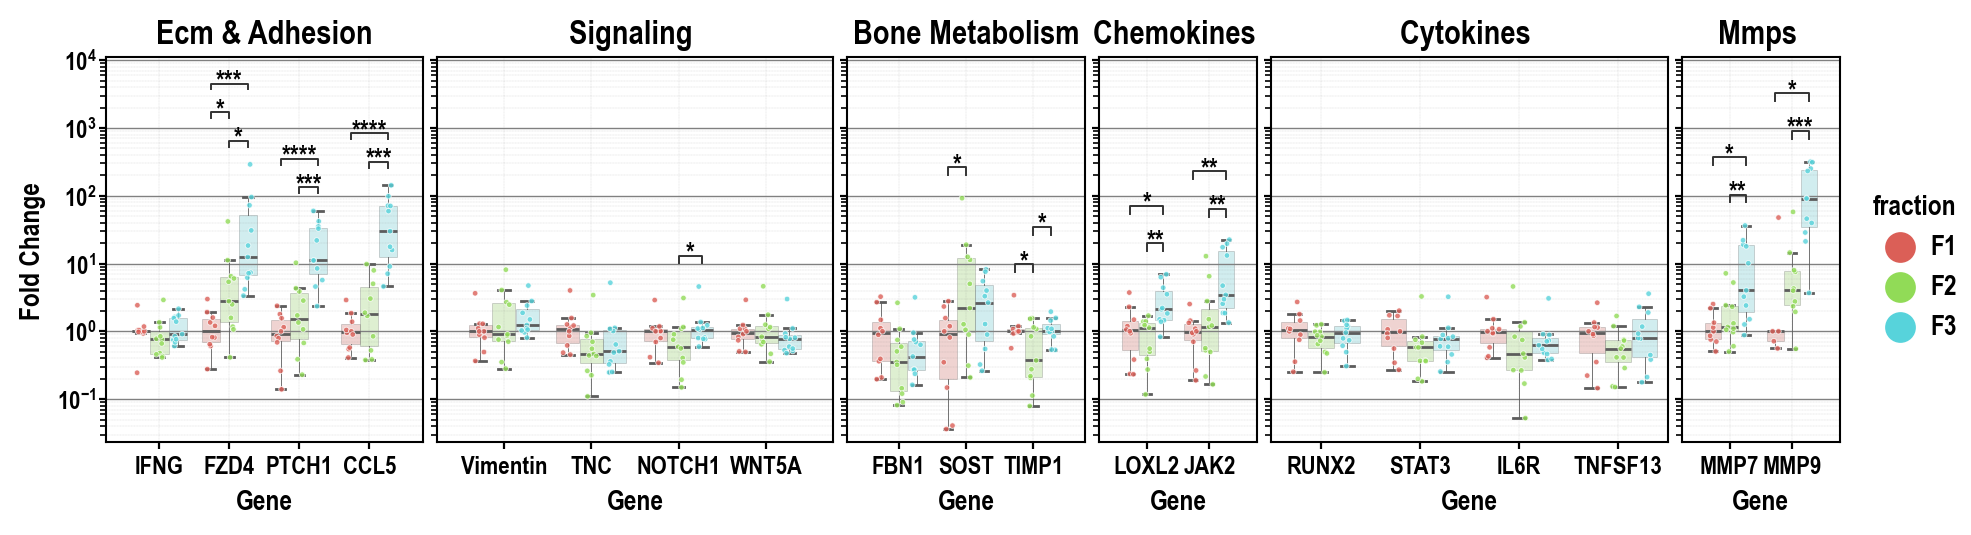

In [7]:
# Colors
plst.set_palette(["#db5f57", "#91db57", "#57d3db"], verbose=False)

# Plot
(
    DA.switch("row", "col", verbose=False)
    .set(y="fc", inplace=False)  # set y back to to fc to display non-log values
    .plot_box_strip(
        subplot_kws=dict(
            figsize=(10, 2.5),
            width_ratios=[4, 5, 3, 2, 5, 2],
        ),
        strip_kws=dict(alpha=0.8),
    )
    .edit_grid()
    .edit_y_scale_log(10)
    .edit_xy_axis_labels(y_leftmost_col="Fold Change", x="Gene")
    .annotate_pairwise(include="__HUE")
)

plt.savefig("qpcr1.png", dpi=300, bbox_inches="tight")